# Загрузка и предобработка данных 

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
import matplotlib.pyplot as plt

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers'))

In [3]:
vectorizer = TfidfVectorizer()
vectorizer.fit(newsgroups_train.data + newsgroups_test.data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [4]:
X_train = vectorizer.transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Обучение моделей

In [5]:
def test(model,ax):
    print(model)
    model.fit(X_train, y_train)
    print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
    #print("Confusion_matrix:", confusion_matrix(y_test, model.predict(X_test), labels = np.unique(model.predict(X_test))))
    plot_confusion_matrix(model, X_test, y_test, 
                          display_labels=newsgroups_test.target_names, 
                          cmap=plt.cm.Blues, ax=ax)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy: 0.8048327137546468


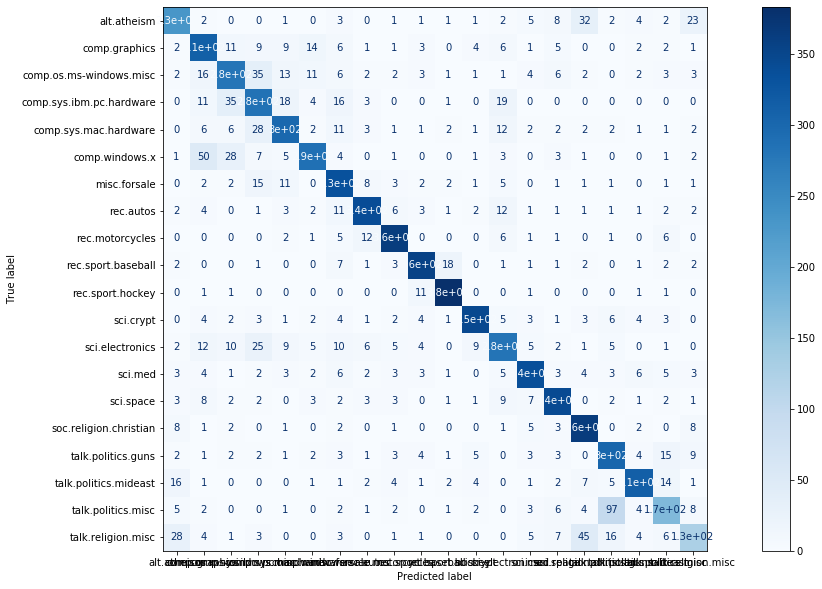

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
test(LinearSVC(), ax)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.774429102496017


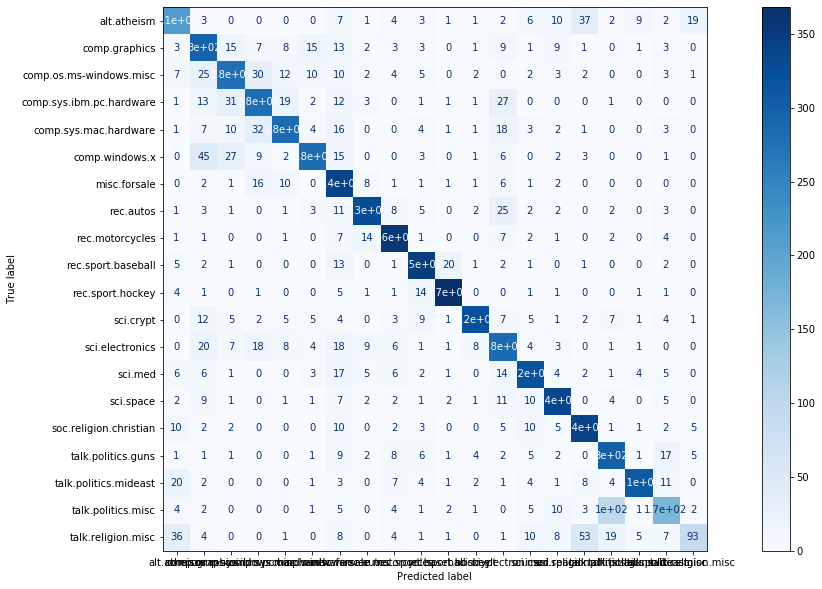

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
test(LogisticRegression(), ax)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Accuracy: 0.72623473181094


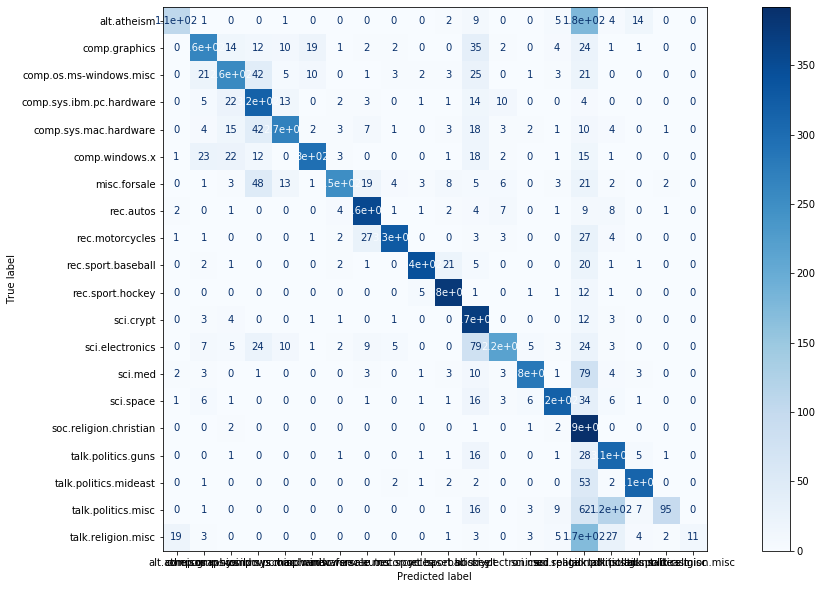

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
test(MultinomialNB(),ax)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)
Accuracy: 0.8089484864577802


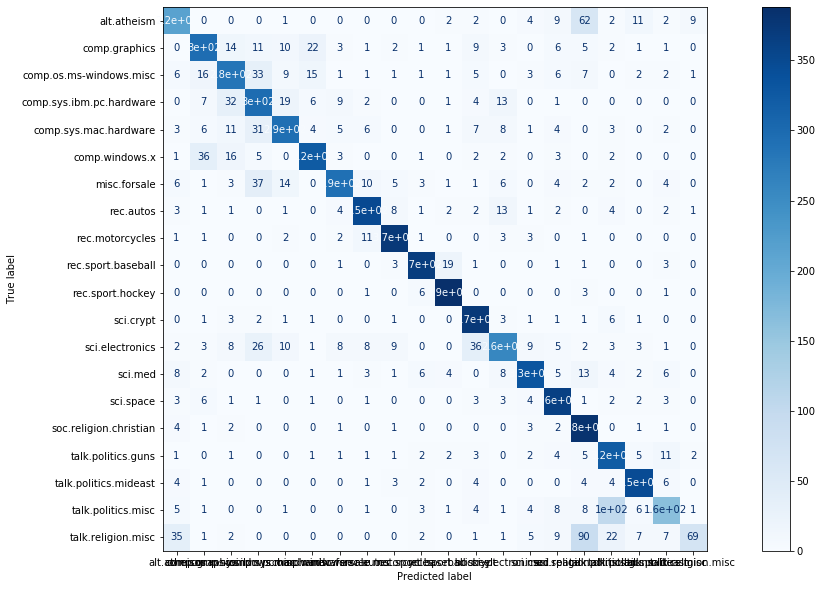

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
test(ComplementNB(),ax)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Accuracy: 0.5371747211895911


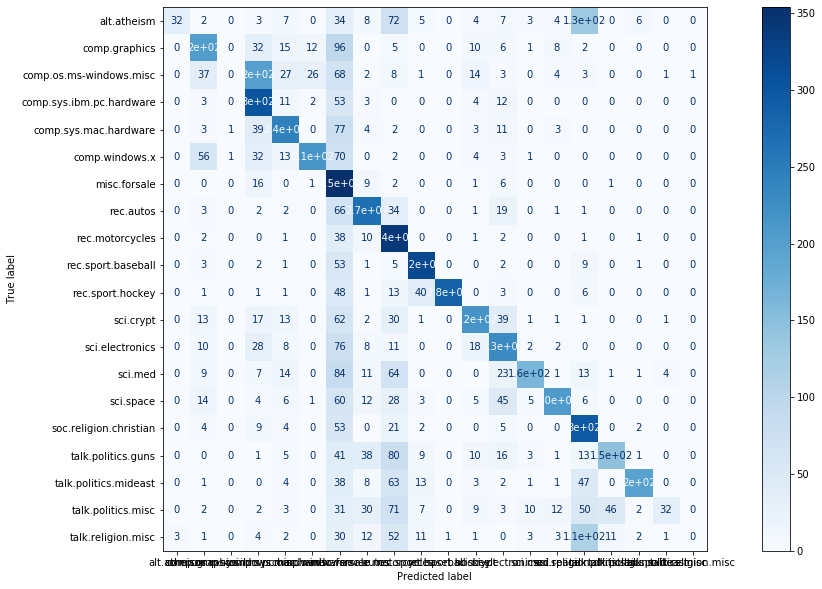

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
test(BernoulliNB(),ax)

# Выводы

Для выбранного набора данных более качественная классификация была получена при помощи метода Complement Naive Bayes.